In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,  AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
warnings.filterwarnings('ignore')

In [4]:
#pip install pandoc

In [5]:
perf = pd.read_csv('academic_performance_data.csv')

Student ID is not needed for this analysis as it doesnt contribute to clustering

In [6]:
perf.drop(columns = 'Student_ID', inplace = True)

In [7]:
perf.head()

,Age,GPA,Study_Hours_per_Week,Absences,Participation_Score,Extracurricular,Exam_Score
0,24,3.74,15,2,92,1,83.65
1,21,2.17,26,8,23,0,91.22
2,30,3.19,12,19,23,0,69.85
3,28,3.97,11,5,3,1,57.82
4,25,3.07,32,17,66,0,86.90


In [8]:
perf['Extracurricular'].unique()

array([1, 0], dtype=int64)

Scaled data to improve silhouette score

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(perf)

Using PCA to reduce the number of columns in to an array to reduce Dimensionality but still retains its original relationship 
with the number of original columns. I'm using 2 components in this fit which transforms the 7 columns to 2 column of arrays

In [10]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_data)


The Dendogram Below highlights how many clusters I should use for my clustering Algorithm(Agglomerative Clustering)
The Number of points on the chart that are not intersected by other points (or intersections)
The RED and ORANGE points are the only points that cannot be intercepted by other points in the chart which totals 4 Points on this chart, therefore i am using 4 Clusters for my algorithm

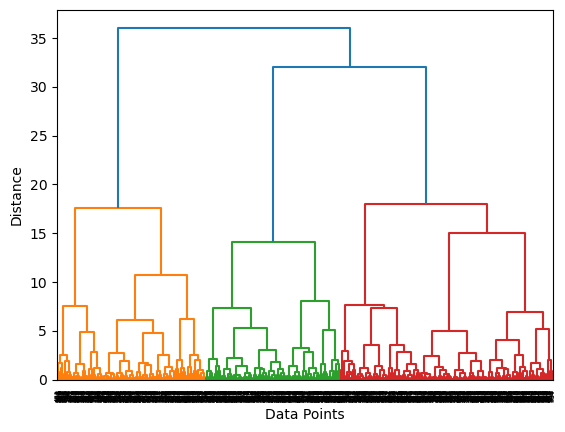

In [11]:
data = pca_data
z = linkage(data, method = 'ward')
dendrogram(z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [12]:
agg = AgglomerativeClustering(n_clusters = 5)
agg_cluster = agg.fit_predict(pca_data)

I'm using Silhouette Score for my Evaluation metric which is above 0 which indicates a border line result in clustering tuning will be done later

In [13]:
agg_sil = silhouette_score (pca_data, agg_cluster)

In [14]:
agg_sil

0.2675601984359522

In [15]:
data = pd.DataFrame(pca_data, columns = ['PCA1', 'PCA2'])

In [16]:
data['Cluster'] = agg_cluster

<Axes: xlabel='PCA1', ylabel='PCA2'>

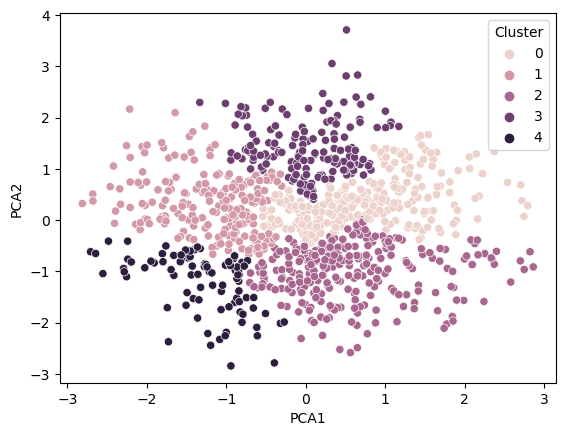

In [17]:
sns.scatterplot(x=data['PCA1'], y = data['PCA2'], hue = data['Cluster'])

In [18]:
perf['Cluster'] =agg_cluster

In [19]:
cluster_summary = perf.groupby('Cluster').agg({
    'Age' : ['median', 'mean'],
    'GPA': ['median', 'mean'],
    'Study_Hours_per_Week' : ['median', 'mean'],
    'Absences' : ['median', 'mean'],
    'Participation_Score' : ['median', 'mean'],
    'Extracurricular' : ['mean', 'median'],
    'Exam_Score' : ['mean', 'median']
})
cluster_summary

Age               GPA           Study_Hours_per_Week             \
        median       mean median      mean               median       mean   
Cluster                                                                      
0         22.0  22.814126  3.010  3.011747                 24.0  23.851301   
1         25.0  24.483092  2.650  2.673961                 31.0  29.526570   
2         25.0  24.575092  3.580  3.498938                 18.0  20.344322   
3         21.5  22.322785  2.465  2.526772                 31.0  29.841772   
4         28.0  26.978495  3.300  3.237634                 25.0  25.290323   

        Absences            Participation_Score            Extracurricular  \
          median       mean              median       mean            mean   
Cluster                                                                      
0            8.0   8.657993                31.0  36.282528        0.245353   
1           12.0  11.531401                66.0  64.951691        0.811594   
2           11.0  10.362637                50.0  49.827839        0.487179   
3            8.0   7.778481                36.0  37.525316        0.310127   
4           15.0  13.806452                83.0  79.419355        0.978495   

               Exam_Score          
        median       mean  median  
Cluster                            
0          0.0  73.697807  72.710  
1          1.0  81.337826  83.160  
2          0.0  66.671868  65.520  
3          0.0  82.700570  83.855  
4          1.0  73.591075  73.040

CLUSTER SUMMARY
From our 4 Clusters we can group them into:
1. Cluster 0: (High Achievers)
Reason: This cluster has individuals with high exam scores, a relatively high age, and strong involvement in participation and extracurricular activities. They also balance well between study hours and GPA.
2. Cluster 1: (Balanced Performers)
Reason: This group performs well academically (high GPA), but has lower participation in extracurricular activities. They have fewer absences and maintain a relatively high study hour commitment.
3. Cluster 2: (Studious but Struggling)
Reason: Individuals in this cluster put in a lot of study time (highest study hours per week) but have relatively lower exam scores and participation. Their involvement in extracurricular activities is also minimal.
4. Cluster 3: (Young Overachievers)
Reason: This cluster is composed of younger individuals (lowest median age) with relatively lower GPA but the highest exam scores. They are more focused on participation and show strong potential in exams despite lower study hours.